I would be using Simple Linear Regression to Predict Salary after Training my model with the Salary Dataset

Importing Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from csv import DictReader

Loading Dataset

In [3]:
x_train = []
y_train = []

with open("Salary_dataset.csv") as f:
    file = DictReader(f)

    for rows in file:
        x_train.append(float(rows['YearsExperience']))
        y_train.append(float(rows['Salary']))

x_train = np.array(x_train)
y_train = np.array(y_train)
mean, std = np.mean(y_train), np.std(y_train)
y_train = (y_train - mean) / std  # Normalized y_train

Visualizing the data

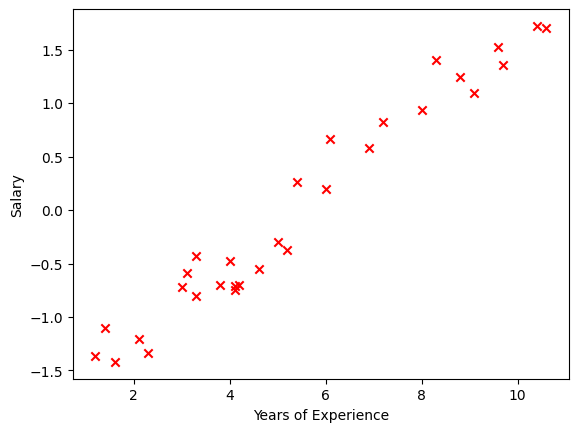

In [4]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Model Function

f = w * x(i) + b  where w and b are both parameters and x is the training feature. i is in the range of 0 to nth trainin g feature

In [5]:
f = lambda w,x,b: w * x + b 

Cost Function
    I will be using the Mean Squared Error Cost Function in this notebook

In [6]:
def cost_function(x,y,w,b):
    m = x.shape[0]

    total_cost = 0.

    for i in range(m):
        cost = (f(w,x[i],b) - y[i]) ** 2
        total_cost += cost
    

    total_cost *= (1 / (2*m)) 

    return total_cost

Running it with some params

[-1.20009801  0.24088632  1.61025658 -0.5437984   0.6968949   0.44652557
  0.32236497 -0.51174505 -1.42425943 -1.84270803 -0.3824558   0.34573233
  2.37778567  1.11816467  0.14553017  0.66762555  0.49808965 -0.16556111
 -1.3551623   0.97284953  1.1646883   0.0949742  -0.98335852 -2.49746692
  0.07974996  0.86763704  1.67717375 -0.15010778  0.94099639  0.42128581]
[4.07169572e+01 7.50962292e-02 3.28206472e+01 1.26562427e+01
 3.25569509e+00 5.54616165e-01 7.74862682e-02 1.16949409e+01
 5.39612675e+01 8.36714510e+01 8.20430834e+00 1.23605688e-01
 8.15901671e+01 1.30475636e+01 3.85004567e-01 2.81991528e+00
 9.20803691e-01 3.74088345e+00 4.96800487e+01 8.92625365e+00
 1.45325406e+01 6.86110877e-01 2.96833027e+01 1.43191046e+02
 7.95356561e-01 6.43111465e+00 3.62031983e+01 3.48945852e+00
 8.12751510e+00 4.11322530e-01]


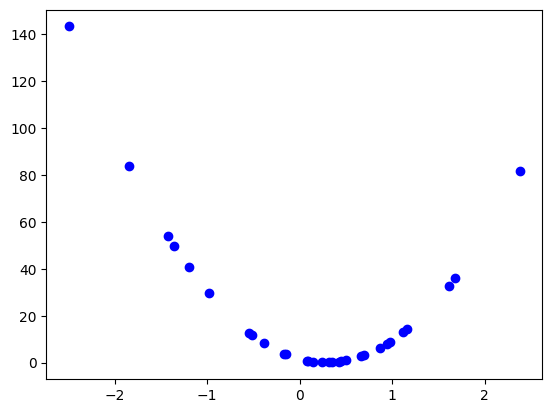

In [7]:
w_ = np.array([np.random.randn() for i in range(30)])
b_ = np.min(y_train)

cost = np.zeros(w_.shape[0])

for i in range(w_.shape[0]):
    cost[i] = cost_function(x_train,y_train,w_[i],b_)

print(w_)
print(cost)
plt.scatter(w_, cost, marker='o', c='b')
plt.show()

From the plot above we could see that at 0.2414086 we got a very minimalized value for MSE, therefore that is the value I will be using for my model

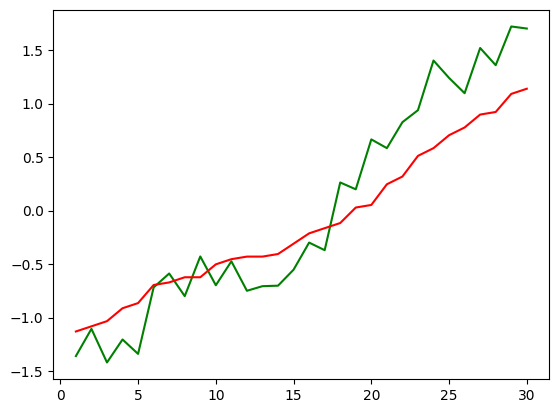

In [10]:
w = 0.2414086
prediction = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    prediction[i] = f(w,x_train[i],b_)

c = [n for n in range(1,x_train.shape[0] + 1, 1)]

plt.plot(c, y_train, c='g')
plt.plot(c, prediction, c='r')
plt.show()

Now we have a plot but it seems our model underfits to an extent, so I will be using the approach of gradient descent to fix params w and b

Gradient Descent
    The idea of gradient descent is to minimize the error by making adjustments to the params at each iteration

    w =  w - learning_rate * (dj_dw)
    b = b - learning_rate * (dj_db)

    dj_dw in this case will be : the differential of the cost function J w.r.t w
    dj_db in this case will be: the differential of the cost function J w.r.t b

In [11]:
def compute_gradient(x,y,w,b):

    m = x.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        y_hat = f(w, x[i], b)
        dj_dw += (y_hat - y[i]) * x[i]
        dj_db += (y_hat - y[i])

    return dj_dw / m , dj_db / m 

The compute_gradient function returns our differential for w and b respectively, now plugging it into our gradient descent implementation

In [12]:
def gradient_descent(x,y,w,b,num_iters,learning_rate):
    for _ in range(num_iters):
        dj_dw, dj_db= compute_gradient(x, y, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

    return w,b

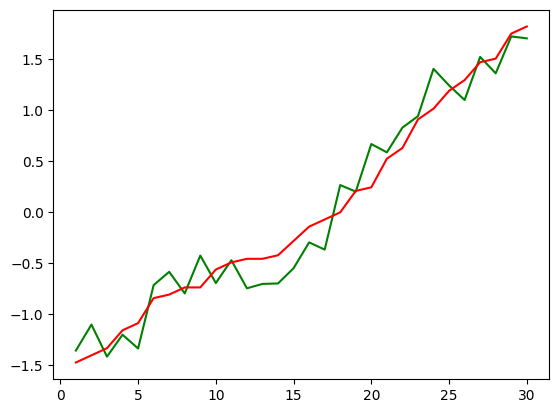

In [14]:
w_in = 0.0

b_in = 0.0

learning_rate = 0.052

num_iters = 10000

w_, b_ = gradient_descent(x_train,y_train,w_in,b_in,num_iters,learning_rate)

prediction = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    prediction[i] = f(w_,x_train[i],b_)

c = [n for n in range(1,x_train.shape[0] + 1, 1)]
plt.plot(c, y_train, c='g')
plt.plot(c, prediction, c='r')
plt.show()

As you can see, gradient descent did a better job at fitting the model, but be careful in selecting your learning rate as high learning rate will cause divergence instead of convergence. Also the higher the num_iters the more the accuracy of your params

so now we can predict with both models

In [134]:
YearsExp = 11.0
Salary = 130000

MSE_model = lambda x: 0.2414086 * x + np.min(y_train)

GD_model = lambda x: w_ * x + b_

reverse_n = lambda y_hat: (y_hat * std) + mean

print(f"Using our Model from MSE: {reverse_n(MSE_model(YearsExp))}")
print(f"Using our Model from Gradient Descent: {reverse_n(GD_model(YearsExp))}")
print(f"True value: {Salary}")

Using our Model from MSE: 109307.27268591287
Using our Model from Gradient Descent: 128797.78950252896
True value: 130000


We can see that our Gradient Descent approach predicted the salary better than the MSE model.